In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Using Zonal Statistics

In [6]:
gdf = gpd.read_file('zonal_stats_final.shp')

In [8]:
df = pd.DataFrame(gdf[['left','top','_mean','_median','_stdev','_min','_max']]).rename(columns={'left':'x','top':'y'})
df.x = df.x.astype(int)
df.y = df.y.astype(int)
df.head(2)

,x,y,_mean,_median,_stdev,_min,_max
0,-180,90,-3715.366128,-4200.0,705.767851,-4353.0,-2092.0
1,-180,89,-3118.617101,-3870.0,1028.026359,-3976.0,-1071.0


<AxesSubplot:xlabel='x', ylabel='y'>

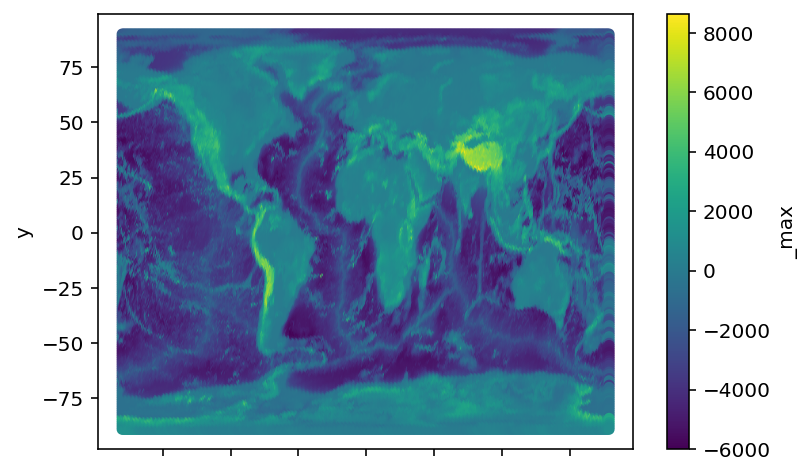

In [9]:
df.plot.scatter(x='x',y='y',c='_max',cmap='viridis')

In [10]:
df['depth_amplitude'] = df.apply(
    lambda row: row.y + row._min/1000 if row._min < 0 else np.NaN, axis=1)

df['height_amplitude'] = df.apply(
    lambda row: row.y + row._max/1000 if row._max > 0 else np.NaN, axis=1)

df['amplitude'] = df.apply(
    lambda row: row.y + row._max/1000 if row._mean > 0 else row.y + row._min/3000, axis=1)

df.head()

,x,y,_mean,_median,_stdev,_min,_max,depth_amplitude,height_amplitude,amplitude
0,-180,90,-3715.366128,-4200.0,705.767851,-4353.0,-2092.0,85.647,NaN,88.549000
1,-180,89,-3118.617101,-3870.0,1028.026359,-3976.0,-1071.0,85.024,NaN,87.674667
2,-180,88,-3824.720694,-3902.0,227.608857,-4031.0,-2920.0,83.969,NaN,86.656333
3,-180,87,-3869.889792,-3884.0,62.479350,-3958.0,-3470.0,83.042,NaN,85.680667
4,-180,86,-2611.742708,-2561.0,280.464874,-3577.0,-2131.0,82.423,NaN,84.807667


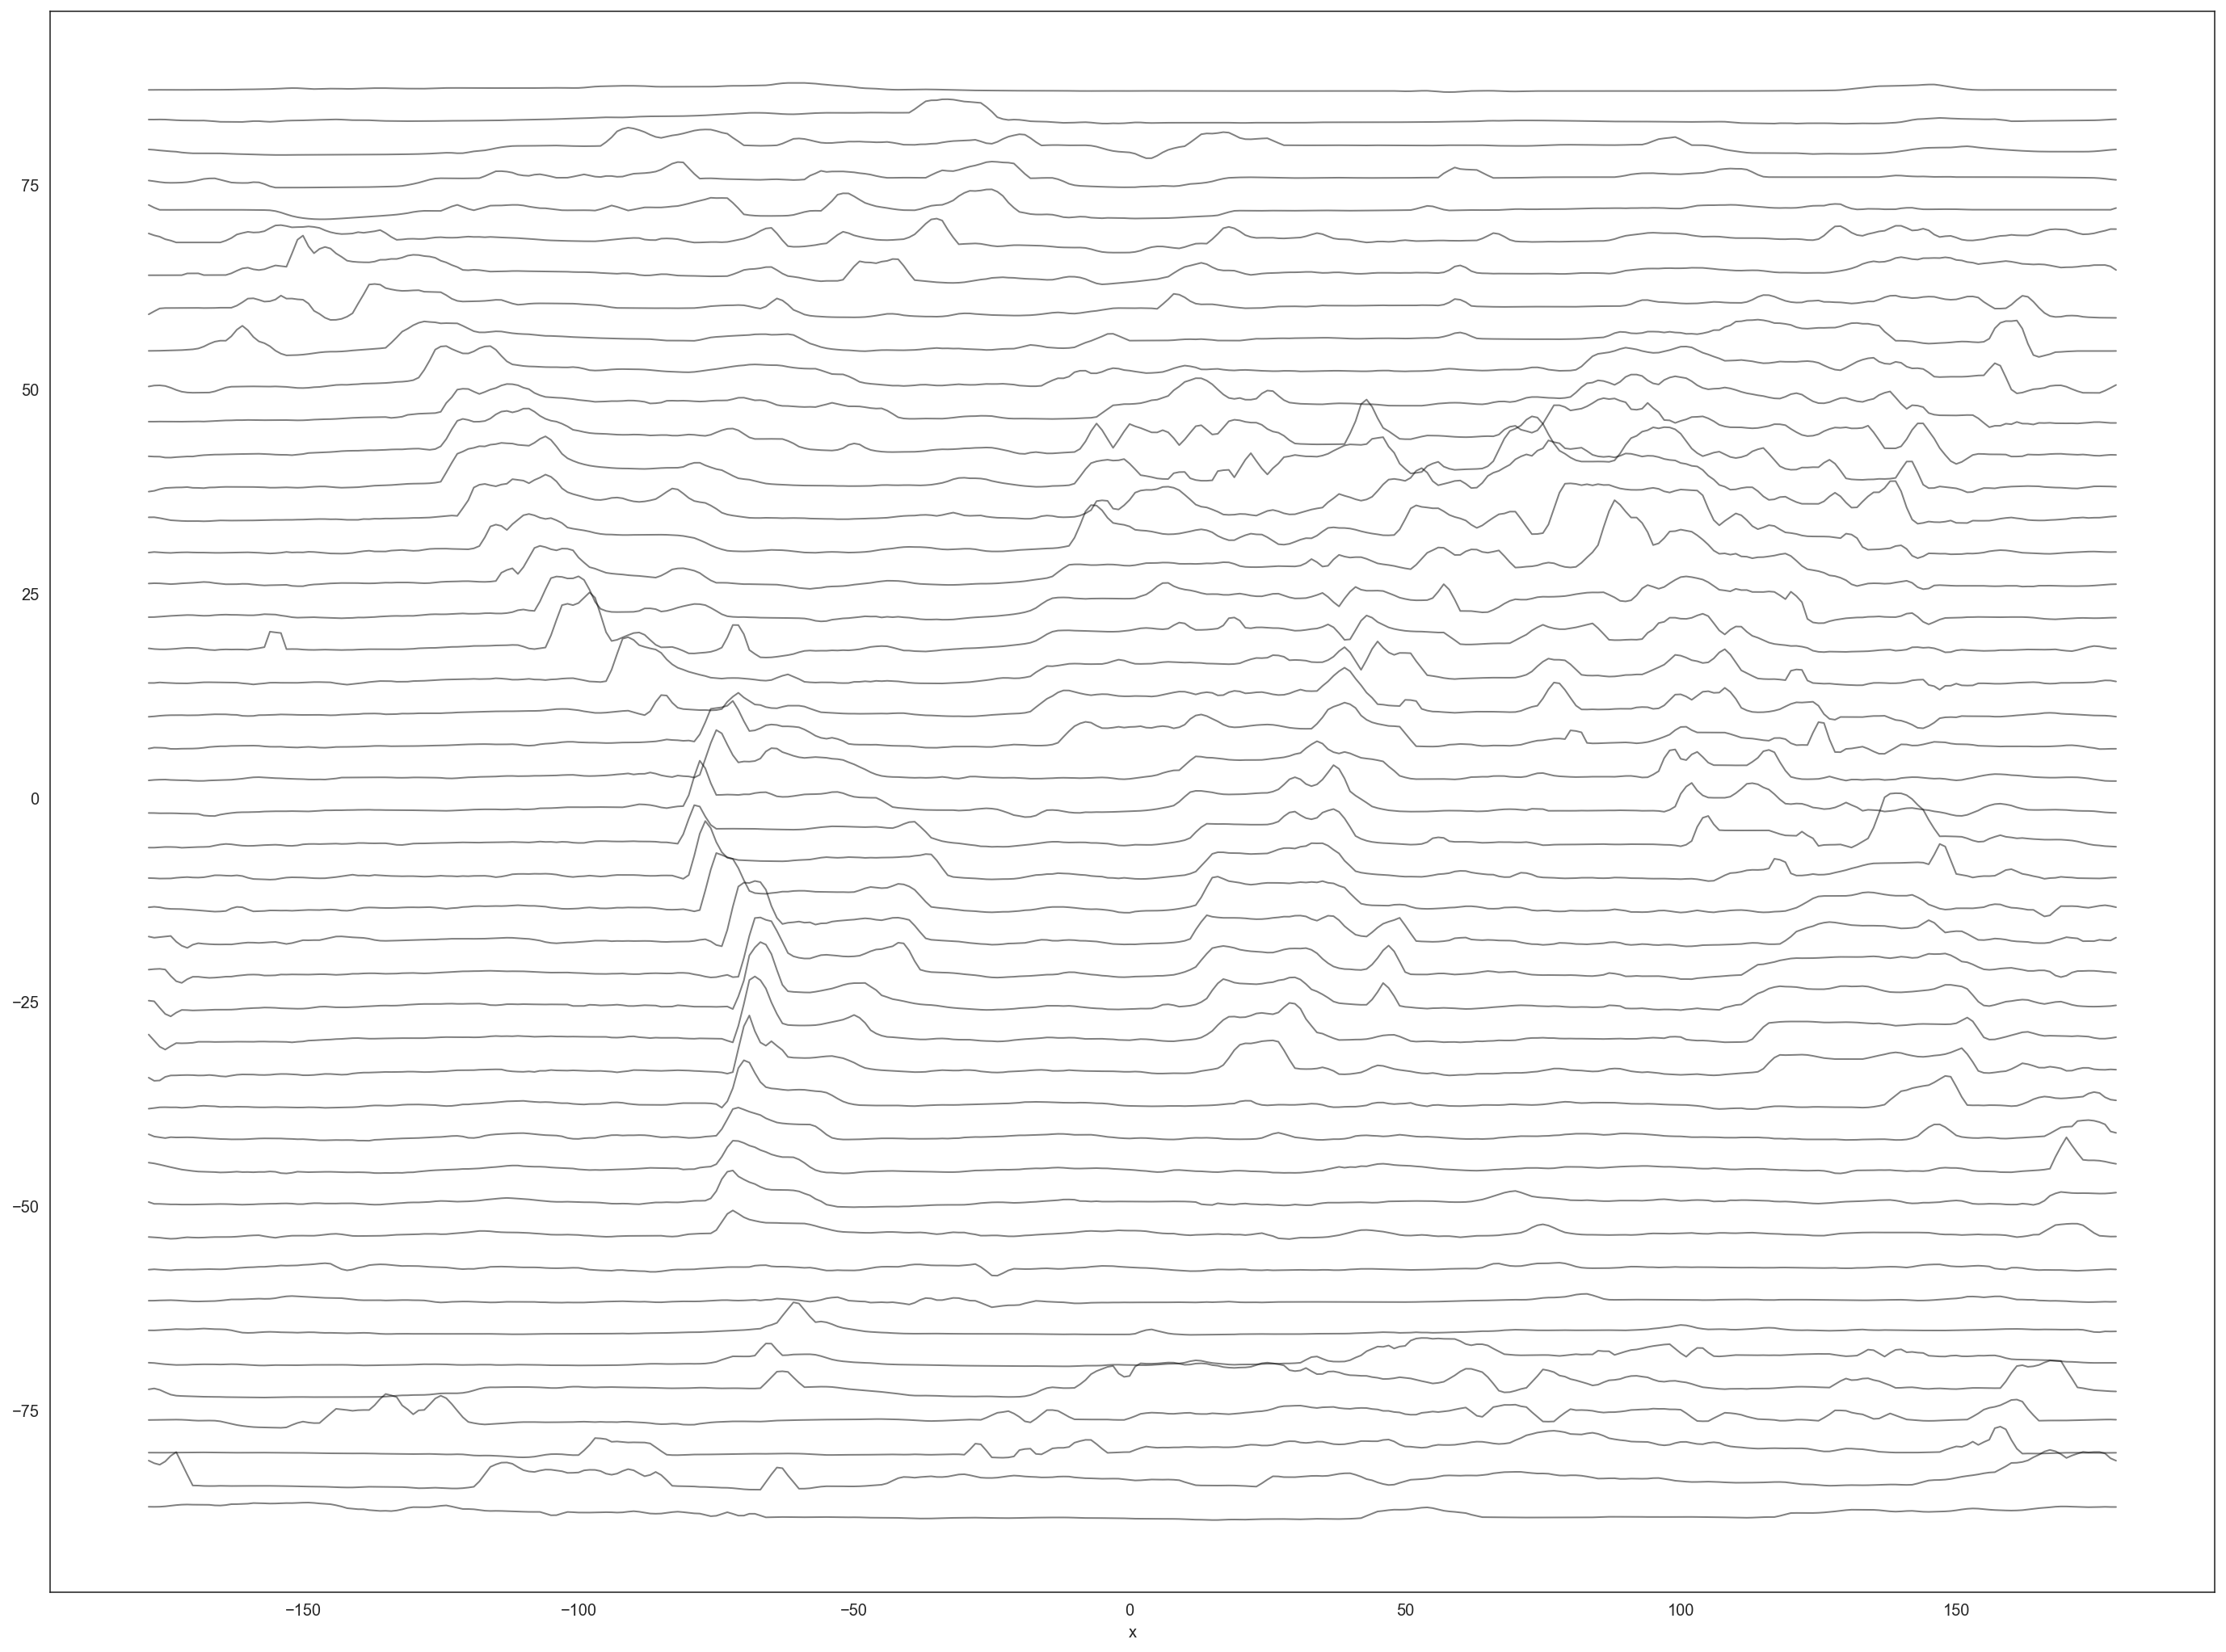

In [18]:
# Now let's try to make it a line plot
sns.set_style('white')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(24,18))

for lat, columns in df.groupby('y'):
    
    row = pd.DataFrame(columns.set_index('x'))

    # Vertical Density of Lines
    if lat % 4 == 0:
        
        row.amplitude.ffill().rolling(3).mean().plot(ax=ax, color='k', linewidth=1, alpha=0.5, 
                                  zorder=lat, legend=None)
        
        
#         row.depth_amplitude.plot(ax=ax, color='blue', linewidth=0.5, alpha=0.7, 
#                                   zorder=lat, legend=None)
        
#         row.height_amplitude.rolling(3).mean().plot(ax=ax, color='black', linewidth=0.5, alpha=0.7, 
#                                   zorder=lat, legend=None)
        
        
#         raw['cleaned'] = raw._min.apply(lambda d: lat + d/1000 if d < 1000 else np.NaN)
        
#         normalized_depth = raw
        
#         normalized_depth = raw.apply( lambda d: (lat + d/1000) if pd.notnull(d) else np.NaN)
        
        
#         ax.fill_between(x=row.index, y1=row.depth_amplitude.rolling(7).mean(), y2=row.y, 
#                         color='blue', alpha=0.1, zorder=lat)
        
#         normalized_depth.cleaned.plot(ax = ax, color='blue',


        
#         # Put the ocean down first
#         ax.fill_between(x=normalized_depth.index, y1=normalized_depth.meters, y2=lat,
#                         color='blue', alpha=0.1, zorder=lat+90)
        
#         normalized_depth.plot(ax = ax, color='blue',linestyle='-',linewidth=0.5, alpha=0.7, 
#                               zorder=lat, legend=None)

#       #Now plot the area white (to cover up the row above it, if it exists)


    
        


          
# ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x) - 180}")
# ax.set_ylim(-75, 75 )
# ax.set_title("3 Degree rolling mean of STDEV (/200) for every 3rd latitude")

In [1]:
# df = gpd.read_file('world_topography_bathymetry.geojson')
# df['x'] = df.geometry.apply(lambda d: round(d.x))
# df['y'] = df.geometry.apply(lambda d: round(d.y))
# df.head()

In [2]:
# coordinates = df.groupby(['x','y']).aggregate({'GEBCO_2022':'mean'}).sort_values(by=['x','y']).reset_index().rename(columns={'GEBCO_2022':'meters'})
# coordinates.plot.scatter(x='x',y='y',c='meters',cmap='viridis', figsize=(15,8), s = 0.75)

In [3]:
# # Now let's try to make it a line plot
# sns.set_style('white')

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1,1, figsize=(24,10))

# for lat, columns in coordinates.groupby('y'):
    
#     # Vertical density of lines
#     if lat % 5 == 0:

#         raw = pd.DataFrame(columns.set_index('x')['meters'])
        
# #       #Define the amplitude of the lines
#         normalized_height = raw[raw.meters >= 0].rolling(3).mean().apply( lambda d: lat + (d/1000) )
#         normalized_depth  = raw[raw.meters < 0].rolling(3).mean().apply( lambda d: lat - np.sqrt(-d)/100 )
        
#         # Put the ocean down first
# #         ax.fill_between(x=normalized_depth.index, y1=normalized_depth.meters, y2=lat,
# #                         color='blue', alpha=0.1, zorder=lat+90)
        
#         normalized_depth.plot(ax = ax, color='blue',linestyle='-',linewidth=0.5, alpha=0.7, 
#                               zorder=lat, legend=None)

# #       #Now plot the area white (to cover up the row above it, if it exists)
# #         ax.fill_between(x=normalized_height.index, y1=lat, y2=normalized_height.meters, 
# #                         color='brown', alpha=0.3, zorder=lat+91)

#         normalized_height.plot(ax = ax, color='k',linestyle='-',linewidth=0.5, alpha=0.7, 
#                               zorder=lat, legend=None)


In [64]:
variances = []
for lat, lons in df.groupby('y'):
    variances.append({
        'lat':lat, 
        'max_var':lons[lons._mean > 0]._max.var(),
        'mean_var':lons[lons._mean > 0]._mean.var(),
        'min_var':lons[lons._mean > 0]._min.var()
    })
    

In [65]:
pd.DataFrame(variances).set_index('lat').sort_values(by='max_var', ascending=False).head(25)

,max_var,mean_var,min_var
lat,,,
31,4.425893e+06,2.430419e+06,1.341602e+06
36,4.272351e+06,2.776493e+06,2.252127e+06
32,4.243289e+06,2.556147e+06,1.900312e+06
34,4.166449e+06,2.846991e+06,2.391549e+06
37,4.129773e+06,2.089542e+06,1.720256e+06
29,4.102582e+06,1.591988e+06,5.679838e+05
30,4.099200e+06,2.079767e+06,1.028932e+06
33,3.978027e+06,2.690145e+06,2.083882e+06
35,3.779005e+06,2.865917e+06,2.462816e+06


(-50.0, 0.0)

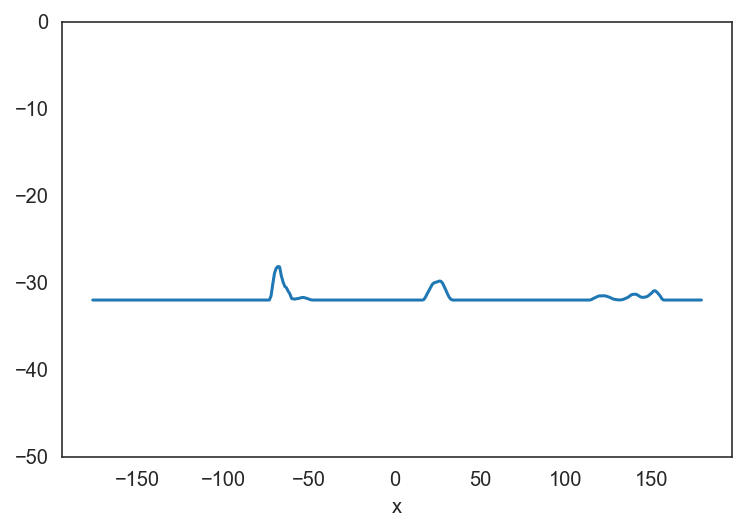

In [115]:
lat = -32
ax = (df[(df.y==lat)].set_index('x')).height_amplitude.fillna(lat).rolling(5).mean().plot()

ax.set_ylim(-50,0)

In [116]:
len(df)

64800

In [118]:
df.to_csv('output.csv')